<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensoflow%20-%20Autoencoders%20-%20Unsupervised%20Artificial%20Neural%20Networks%20(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensoflow - Autoencoders - Unsupervised Artificial Neural Networks (ANN)**

### Table of Contents
 - Introduction
 - Feature Extraction and Dimensionality Reduction
 - Autoencoder Structure
 - Performance
 - Code

### 1. Introduction
Autoencoders, based on Restricted Boltzmann Machines, are employed in some of the largest deep learning applications. They are the building blocks of Deep Belief Networks (DBN).

### 2. Feature Extraction and Dimensionality Reduction

Say that you want to extract what emotion the person in photography is feeling. Using the following 256x256 pixel grayscale picture as an example

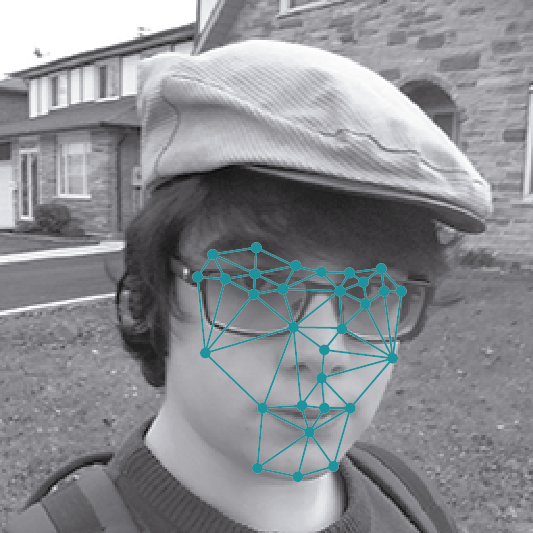

But when using this picture we start running into a bottleneck! Because this image being 256x256 pixels in size correspond with an input vector of 65536 dimensions! If we used an image produced with conventional cellphone cameras, that generates images of 4000 x 3000 pixels, we would have 12 million dimensions to analyze.:

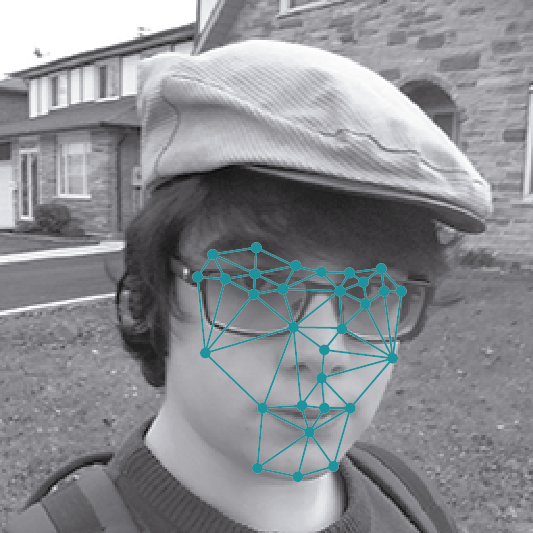

As you can see, it increases exponentially! Returning to our example, we don’t need to use all of the 65,536 dimensions to classify an emotion. A human identifies emotions according to some specific facial expression, some key features, like the shape of the mouth and eyebrows.


### 3. Autoencoder Structure

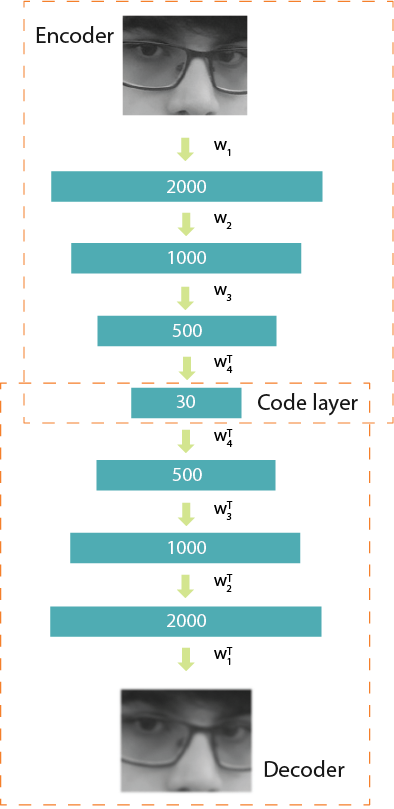

An autoencoder can be divided into two parts :

1. Encoder : the encoder needs to compress the representation of the input. In this case, we are going to reduce the dimension of the face of our actor, from 2000 dimensions to only 30 dimensions, by running the data through layers of our encoder.

2. Decoder: the decoder works like an encoder network in reverse. It works to recreate the input, as closely as possible. This plays an important role during training because it forces the autoencoder to select the most important features in the compressed representation.

### 4. Code

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Now, let’s give the parameters that are going to be used by our NN.

In [ ]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256  # 1st layer num features
n_hidden_2 = 128  # 2nd layer num features
n_input = 784  # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    "encoder_h1": tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "encoder_h2": tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "decoder_h1": tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    "decoder_h2": tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}

biases = {
    "encoder_b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "encoder_b2": tf.Variable(tf.random_normal([n_hidden_2])),
    "decoder_b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "decoder_b2": tf.Variable(tf.random_normal([n_input])),
}

Now we need to create our encoder. For this, we are going to use sigmoidal functions. Sigmoidal functions deliver great results with this type of network. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:

In [ ]:
# Building the Encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(
        tf.add(tf.matmul(x, weights["encoder_h1"]), biases["encoder_b1"])
    )

    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(
        tf.add(tf.matmul(layer_1, weights["encoder_h2"]), biases["encoder_b2"])
    )

    return layer_2

And the decoder: You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [ ]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(
        tf.add(tf.matmul(x, weights["decoder_h1"]), biases["decoder_b1"])
    )

    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(
        tf.add(tf.matmul(layer_1, weights["decoder_h2"]), biases["decoder_b2"])
    )

    return layer_2

Let’s construct our model. In the variable cost we have the loss function and in the optimizer variable we have our gradient used for backpropagation.

In [ ]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [ ]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [ ]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [ ]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
total_batch = int(mnist.train.num_examples / batch_size)

# Training cycle
for epoch in range(training_epochs):

    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})

    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Above we have taken 20 Epochs.

Now, let’s apply encoder and decoder for our tests.

In [ ]:
# Applying encode and decode over test set
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

# Lets Let’s simply visualize our graphs!
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))